In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2

%matplotlib inline
from tensorflow import keras
from PIL import Image

**Set the constant values**

In [2]:
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10
CHANNELS = 3

import the `data`

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("data/brain_tumor_dataset",
                                                              shuffle=True,
                                                              image_size=(IMG_SIZE, IMG_SIZE),
                                                              batch_size=BATCH_SIZE)

Found 253 files belonging to 2 classes.


In [4]:
class_name = dataset.class_names

In [5]:
class_name

['no', 'yes']

plot our `images`

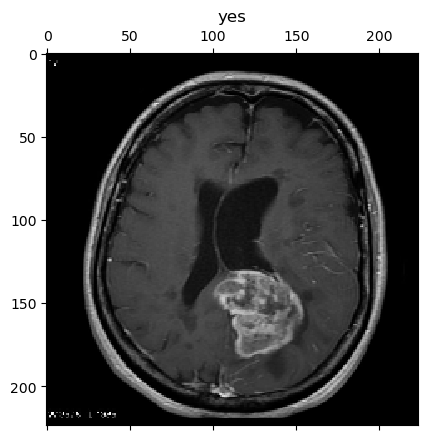

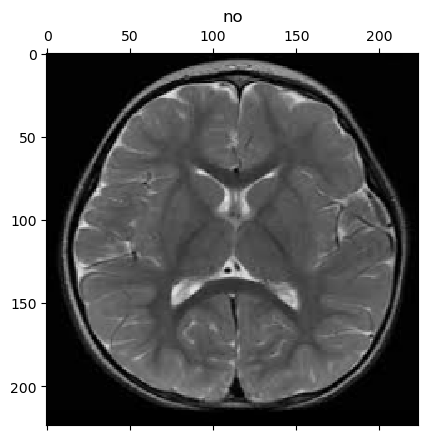

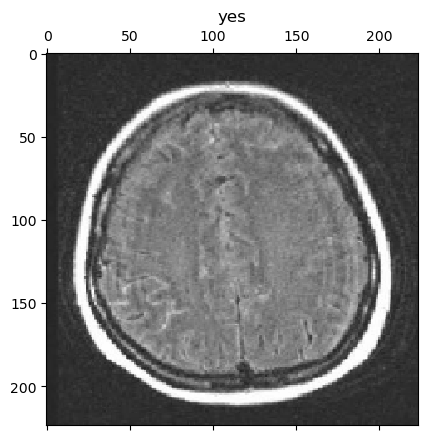

In [6]:
for image, label in dataset.take(1):
    for i in range(3):
        image_uint8 = image[i].numpy().astype('uint8')
#         print(image.shape)
        plt.matshow(image_uint8)
        plt.title(class_name[label[i]])

**Split the data**

In [7]:
def create_data_batch(dataset,test_size = 0.1,train_split=0.8,val_split=0.1,shuffle=True,shuffle_size=1000):
      ds_size = len(dataset)
      if shuffle:
        dataset = dataset.shuffle(shuffle_size,seed=12)
      train_size = int(ds_size*train_split)
      val_size = int(ds_size*val_split)

      train_ds = dataset.take(train_size)
      val_ds = dataset.skip(train_size).take(val_size)
      test_ds = dataset.skip(train_size).skip(val_size)

      return train_ds,val_ds,test_ds

In [8]:
train_ds,val_ds,test_ds = create_data_batch(dataset)

`Resize` the input image

In [9]:
rescaling_resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255),
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE,IMG_SIZE)
])

Build our `model`

In [10]:
model = tf.keras.Sequential([
    rescaling_resize,
    keras.layers.Conv2D(35, kernel_size=(3,3), activation="relu", input_shape=(BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(40, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(50, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="sigmoid")
])

model.build((BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS))

In [11]:
model.compile(optimizer="adam", loss=tf.losses.sparse_categorical_crossentropy, metrics=["acc"])

In [12]:
history = model.fit(train_ds,validation_data=val_ds, epochs=EPOCHS)

Epoch 1/10
6/6 [==============================] - 11s 2s/step - loss: 0.5771 - acc: 0.6614
Epoch 2/10
6/6 [==============================] - 9s 1s/step - loss: 0.5025 - acc: 0.7778
Epoch 3/10
6/6 [==============================] - 9s 1s/step - loss: 0.4516 - acc: 0.8021
Epoch 4/10
6/6 [==============================] - 9s 1s/step - loss: 0.4149 - acc: 0.8571
Epoch 5/10
6/6 [==============================] - 9s 1s/step - loss: 0.2818 - acc: 0.8958
Epoch 6/10
6/6 [==============================] - 9s 1s/step - loss: 0.2299 - acc: 0.9048
Epoch 7/10
6/6 [==============================] - 9s 1s/step - loss: 0.1051 - acc: 0.9630
Epoch 8/10
6/6 [==============================] - 9s 1s/step - loss: 0.1015 - acc: 0.9577
Epoch 9/10
6/6 [==============================] - 9s 1s/step - loss: 0.0546 - acc: 0.9792
Epoch 10/10
6/6 [==============================] - 10s 2s/step - loss: 0.0454 - acc: 0.9841


Evaluate with test `image`

In [13]:
model.evaluate(test_ds)

2/2 [==============================] - 2s 381ms/step - loss: 0.0063 - acc: 1.0000


[0.006299225147813559, 1.0]

In [14]:
history.history.keys()

dict_keys(['loss', 'acc'])

## External image testing

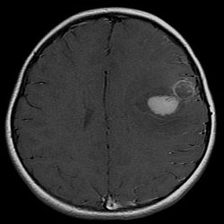

In [23]:
img = Image.open("D:\\image for testing\Y31.jpg").resize((IMG_SIZE,IMG_SIZE))
img

In [24]:
img_arr = tf.keras.preprocessing.image.img_to_array(img)
img_rgb = cv2.cvtColor(img_arr, cv2.COLOR_GRAY2RGB)
img = np.expand_dims(img_rgb, axis=0)
img.shape

(1, 224, 224, 3)

In [25]:
predicted = model.predict(img)
predicted

1/1 [==============================] - 0s 78ms/step


array([[0.01839127, 0.9771895 ]], dtype=float32)

In [26]:
print(class_name[np.argmax(predicted)])

yes
